# Creating a pandapipes network including height differences

This tutorial shows how to define junctions on different height levels. The following network will be created.

<img src="pics/rng_height.png">

### Empty network

At first, pandapipes is imported. We will then create an empty network container and specify the
fluid. The fluid water from the pandapipes library is used.

In [1]:
import pandapipes as pp

In [2]:
net = pp.create_empty_network(fluid="water") # create an empty network

The <span style="color:blue">create</span> functions are used to create more components. The components will be added to the corresponding component tables.

### Junctions

In [3]:
junction1 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 352, name="Junction 1")
junction2 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 358, name="Junction 2")
junction3 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 361, name="Junction 3")
junction4 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 346, name="Junction 4")
junction5 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 400, name="Junction 5")

The junctions are now stored in the net and can be called. Some parameters, which were not explicitly mentioned in the last section, were defined using default values. Note that the parameters of the junctions above contain the parameter height_m, which defines the height above sea level of the junction. The stored potential energy is automatically respected by pandapipes.

In [4]:
net.junction # show junction table

,name,pn_bar,tfluid_k,height_m,in_service,type
0,Junction 1,1.0,293.15,352.0,True,junction
1,Junction 2,1.0,293.15,358.0,True,junction
2,Junction 3,1.0,293.15,361.0,True,junction
3,Junction 4,1.0,293.15,346.0,True,junction
4,Junction 5,1.0,293.15,400.0,True,junction


In the next steps, more components are added.

### External Grid

In the example, the external grid is connected to junction5. The pressure is at 0.5 bar.

In [5]:
medium_pressure_grid = pp.create_ext_grid(net, junction=junction5, p_bar=0.5, t_k=293.15, name="Grid Connection")

net.ext_grid # show external grid table

,name,junction,p_bar,t_k,in_service,type
0,Grid Connection,4,0.5,293.15,True,pt


### Pipes

The network contains four pipes. The lenghts and the junctions are displayed on the network
figure. Pipe 4 is defined using a roughness k_mm of 0.5 mm, which deviates from the default
value of 1 mm.

In [6]:
pipe1 = pp.create_pipe_from_parameters(net, from_junction=junction1, to_junction=junction2, length_km=0.545, diameter_m=0.2,  name="Pipe 1")
pipe2 = pp.create_pipe_from_parameters(net, from_junction=junction2, to_junction=junction3, length_km=0.095, diameter_m=0.15, name="Pipe 2")
pipe3 = pp.create_pipe_from_parameters(net, from_junction=junction1, to_junction=junction4, length_km=0.285, diameter_m=0.15, name="Pipe 3")
pipe4 = pp.create_pipe_from_parameters(net, from_junction=junction1, to_junction=junction5, length_km=0.43, diameter_m=0.15, k_mm=0.5, name="Pipe 4")

Up to now, the pipe components table looks like the table displayed in the following section:

In [7]:
net.pipe # show pipe table

,name,from_junction,to_junction,std_type,length_km,diameter_m,k_mm,loss_coefficient,u_w_per_m2k,text_k,qext_w,sections,in_service,type
0,Pipe 1,0,1,None,0.545,0.20,0.2,0.0,0.0,NaN,0.0,1,True,pipe
1,Pipe 2,1,2,None,0.095,0.15,0.2,0.0,0.0,NaN,0.0,1,True,pipe
2,Pipe 3,0,3,None,0.285,0.15,0.2,0.0,0.0,NaN,0.0,1,True,pipe
3,Pipe 4,0,4,None,0.430,0.15,0.5,0.0,0.0,NaN,0.0,1,True,pipe


The parameters `from_junction` and `to_junction` define the orientation of the pipe. If the flow
enters the pipe at the `from_junction` node and leaves it through the `to_junction` node, the
velocity will have a positive sign. Otherwise, it has a negative sign.

### Sinks


With a sink, a constant mass flow can be defined. Here, we will create two sinks with mass flows of
277 g/s and 139 g/s. Sinks and sources are always assigned to a specific junction. The sign of the
mass flow is positive, if a mass flow is removed from the system.

In [8]:
sink = pp.create_sink(net, junction=junction4, mdot_kg_per_s=0.277, name="Sink 1")
sink = pp.create_sink(net, junction=junction3, mdot_kg_per_s=0.139, name="Sink 2")
net.sink

,name,junction,mdot_kg_per_s,scaling,in_service,type
0,Sink 1,3,0.277,1.0,True,sink
1,Sink 2,2,0.139,1.0,True,sink


The calculation is now started. The pipe friction can be respected using different models. By default, the Nikuradse model is used. A distinction between laminar and turbulent flow is not implemented in pandapipes. Typically, pipe calculation software detects the kind of flow. However, for pandapipes applications, we usually can expect turbulent flow conditions.

Nevertheless, a distinction between laminar and turbulent flow will be added in the future.

In [9]:
pp.pipeflow(net, friction_model="nikuradse")

The results are ready now and can be displayed with the following commands:

In [10]:
net.res_junction  # calculated pressure and temperature at junctions

,p_bar,t_k
0,5.194289,293.15
1,4.607435,293.15
2,4.314005,293.15
3,5.781005,293.15
4,0.500000,293.15


In [11]:
net.res_pipe  # velocities, mass flows through pipes and other results

,v_mean_m_per_s,p_from_bar,p_to_bar,t_from_k,t_to_k,t_outlet_k,mdot_from_kg_per_s,mdot_to_kg_per_s,vdot_m3_per_s,reynolds,lambda
0,0.004433,5.194289,4.607435,293.15,293.15,293.15,0.139,-0.139,0.000139,886.106589,0.091849
1,0.007880,4.607435,4.314005,293.15,293.15,293.15,0.139,-0.139,0.000139,1181.475451,0.075241
2,0.015704,5.194289,5.781005,293.15,293.15,293.15,0.277,-0.277,0.000278,2354.451079,0.048254
3,-0.023584,5.194289,0.500000,293.15,293.15,293.15,-0.416,0.416,-0.000417,3535.926531,0.045036


## Plotting

Using matplotlib, the network can easily be plotted.

hp.pandapipes.plotting.simple_plot - WARNING: No or insufficient geodata available --> Creating artificial coordinates. This may take some time


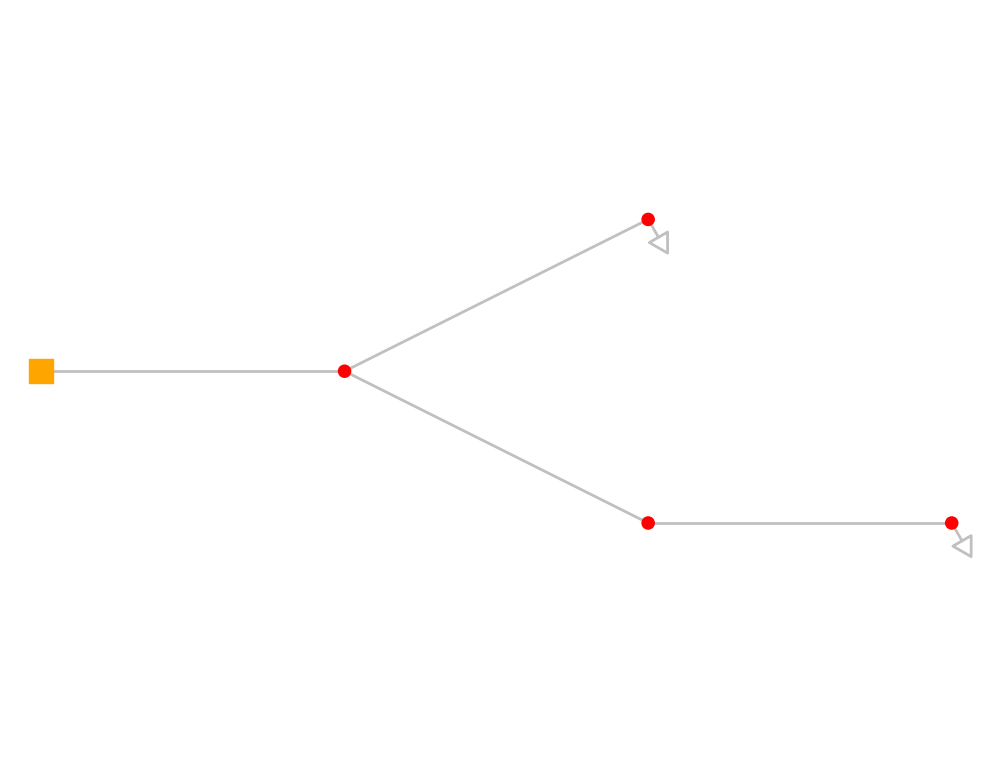

<Axes: >

In [12]:
import matplotlib
from pandapipes.plotting.simple_plot import simple_plot as sp

sp(net, plot_sinks = True)

As long as no coordinates have been explicitly added to the junctions, automatically generated coordinates are used.